In [1]:
import matplotlib.pyplot as plt
import cv2
from random import choice, randint

In [2]:
image = plt.imread("../SeqNAM-wetlab.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

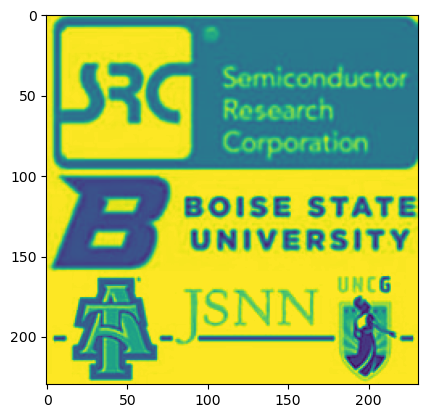

In [3]:
plt.imshow(gray)
plt.show()

In [4]:
binary_string = ""

nrow, ncol = gray.shape

for i in range(0,nrow):
    
    for j in range(0,ncol):
        
        pixel = gray[i,j]
        
        binary = "{:08b}".format(pixel)
        
        binary_string+=binary

In [5]:
def encoding(binary):
    
    seq = []
    
    zero = ["A","C"]
    
    one = ["G", "T"]
    
    for bit in binary:
        
        if int(bit) == 0:
            
            nt = choice(zero)
            seq.append(nt)
            
        if int(bit) == 1:
            nt = choice(one)
            seq.append(nt)
            
        else:
            pass
            
    
    
    bar = ["AAAA", "TTTT", "GGGG", "CCCC"]
    
            
    for idx in range(0,len(seq) - 4):
        
        subseq_list = seq[idx: idx + 4]
        
        subseq = "".join(subseq_list)
    
        
        
        
        if subseq in bar and subseq == "AAAA":
            
            seq[idx + 2] = "C"
            
            
            
        if subseq in bar and subseq == "TTTT":
            
            
            seq[idx + 2] = "G"
            
            
        if subseq in bar and subseq == "GGGG":
            
            seq[idx + 2] = "T"
            
        if subseq in bar and subseq == "CCCC":
            
            
            seq[idx + 2] = "A"
            
        else:
            pass
        
    
    return "".join(seq)

In [6]:
encoded_seq = encoding(binary_string)

In [7]:
count = 0

ban = ["AAAA", "GGGG", "CCCC", "TTTT"]

for idx in range(0, len(encoded_seq)):
    
    subseq = encoded_seq[idx : idx + 4]
    
    if subseq in ban:
        
        count+=1
        
count

0

In [9]:
with open("SeqNAM_Church.fa", "w") as outfile:
    
    outfile.write(">Church_encoded" +"\n"+ encoded_seq)

In [10]:
with open("SeqNAM_Church.fa", "r") as infile:
    
    next(infile)
    
    for line in infile:
    
        for idx in range(0, len(line) - 340,340):
        
            seq_header = "Church_seq{}".format(idx)
        
            subseq = line[idx : idx + 340]
        
            with open("SeqNAM_Church_subseqs.fa", "a") as outfile:
            
                outfile.write(">" + seq_header + "\n" + subseq + "\n")  